# Application of multi-domain cross-correlation at Carajás (Pará, Brazil)

In [2]:
# Import packages
import sys, time, numpy
from scipy.interpolate import griddata
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

In [3]:
# Writing the path for source codes
mypath = sys.path.append('/home/delimar/Documents/sources/')

## Part 1 - Reading the file and analyzing it

In [4]:
# There are six channels and a tab delimitation. Besides we have to skip one single row.
X, Y, Long, Lat, Tf, F = numpy.loadtxt('magdata_carajas.XYZ', skiprows = 1, 
                                       usecols=(0,1,2,3,4,5), unpack = True)

In [5]:
# Define the area
geografic_area = (Long.min(), Long.max(), Lat.min(), Lat.max())
projected_area = (X.min(), X.max(), Y.min(), Y.max())

In [6]:
print 'Study area (degrees):', numpy.round(geografic_area, decimals = 3) 
print 'Study area (meters):', numpy.round(projected_area, decimals = 2)

Study area (degrees): [-51.815 -49.475  -4.03   -2.921]
Study area (meters): [ 409432.  669346. 9554600. 9677098.]


In [7]:
# Define the minimum and maximum values
longmin = numpy.round(Long.min(), decimals = 2)
longmax = numpy.round(Long.max(), decimals = 2)
latmin = numpy.round(Lat.min(), decimals = 2)
latmax = numpy.round(Lat.max(), decimals = 2)

In [8]:
# Analysing the total field anomaly data
print 'Total field anomaly data:'
print 'Min:', Tf.min()
print 'Max:', Tf.max()

Total field anomaly data:
Min: -4230.0
Max: 878.0


In [9]:
# Analysing the total field intensity data
print 'Total field anomaly data:'
print 'Min:', F.min()
print 'Max:', F.max()

Total field anomaly data:
Min: 23037.0
Max: 28142.0


## Part 2 - Interpolate the data and drawing the basemap

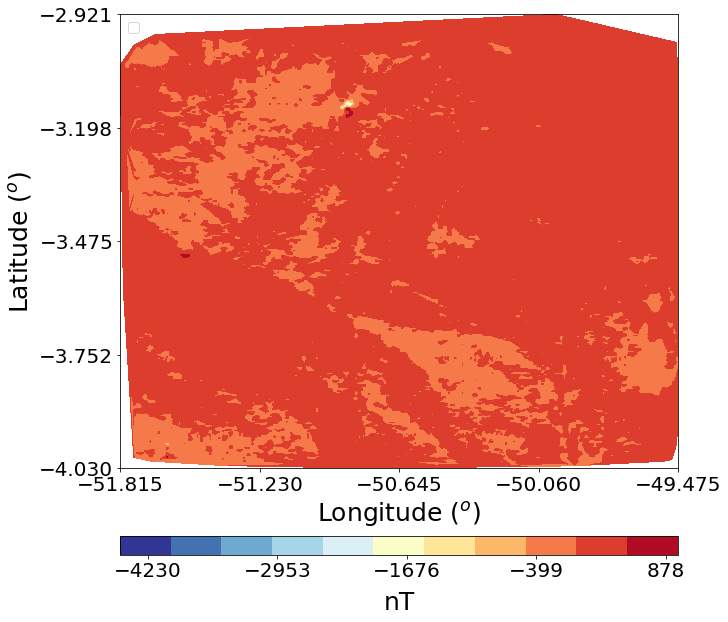

In [10]:
# Plotting the contour map
pyplot.figure(figsize=(10, 10))
cs1 = pyplot.tricontourf(Long, Lat, Tf, 10, vmin = Tf.min(), vmax = Tf.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(Tf.min(), Tf.max(), 5))
cb.set_clim(Tf.min(), Tf.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(Long.min(), Long.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(Lat.min(), Lat.max(), 5), fontsize = 20)
pyplot.xlim(Long.min(), Long.max())
pyplot.ylim(Lat.min(), Lat.max())
pyplot.legend(loc = 'upper left', fontsize = 'x-large')
pyplot.savefig('figs/figure06-anomaly-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/figure06-anomaly-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

pyplot.show()

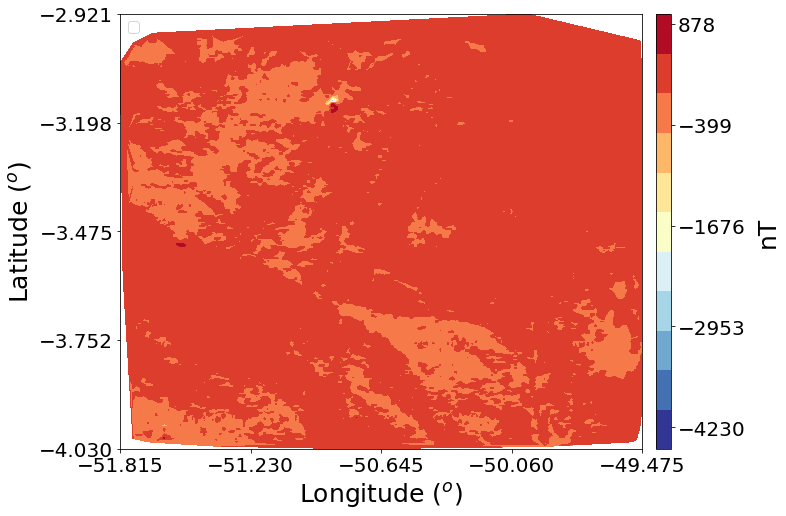

In [11]:
# Plotting the contour map
pyplot.figure(figsize=(10, 8))
cs1 = pyplot.tricontourf(Long, Lat, Tf, 10, vmin = Tf.min(), vmax = Tf.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(Tf.min(), Tf.max(), 5))
cb.set_clim(Tf.min(), Tf.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(Long.min(), Long.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(Lat.min(), Lat.max(), 5), fontsize = 20)
pyplot.xlim(Long.min(), Long.max())
pyplot.ylim(Lat.min(), Lat.max())
pyplot.legend(loc = 'upper left', fontsize = 'x-large')
pyplot.savefig('figs/figure06-anomaly-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/figure06-anomaly-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)

pyplot.show()

In [12]:
# Import the grid function
from codes import grids

In [13]:
# Define number of points and shape
num = 250
longitude = numpy.linspace(longmin, longmax, 250)
latitude = numpy.linspace(latmin, latmax, 250)

In [14]:
# Creates the grid
gridlong, gridlat = numpy.meshgrid(longitude, latitude)

In [15]:
# Create the tuples
flightcoordinates = (Long, Lat)
gridcoordinates = (gridlong, gridlat)

In [16]:
# Interpolate the total field anomaly data and also the magnetic field intensity
Tfi = griddata(flightcoordinates, Tf, gridcoordinates, method = 'cubic')
Fi = griddata(flightcoordinates, F, gridcoordinates, method = 'cubic')

In [17]:
# Setting values for colorbar:
vtfmin = Tf.min()
vtfmax = Tf.max()
vfmin = F.min()
vfmax = F.max()

## Part 3 - Interpolation to apply cross-correlation

In [18]:
# Import usefull libraries
from utm import from_latlon

**Here we will work with projected coordinates !**

In [19]:
# Find the utm zone of all data:
pp = []
for k in range(Long.size):
    l = from_latlon(Lat[k], Long[k])
    pp.append(l[2])

In [20]:
# Show the zone number
numpy.min(pp), numpy.max(pp)

(22, 22)

In [21]:
# Select our study area
#cornerxmin = (Long.any() <= -50.75 and Long.any() >= -51.)
#cornerxmax = Long >= -51.
#cornerymin = Lat <= -3.
#cornerymax = Lat >= -3.25

In [22]:
# Define the grid informations
shape = (40, 40)
h = -50.

In [23]:
# Create the grid
long0, lati0, zo = grids.regular_grid((-51., -50.7, -3.3, -3.), shape, h)

In [24]:
# Create the empty list
xo = []
yo = []

In [25]:
# Convert to UTM
for k in range(long0.size):
    xy = from_latlon(lati0[k], long0[k], force_zone_number = 22)
    xo.append(xy[0])
    yo.append(xy[1])

In [26]:
# Convert as array
xo = numpy.array(xo)
yo = numpy.array(yo)

In [27]:
# New total field anomaly data
tf = griddata((X, Y), Tf, (xo, yo), method = 'cubic', fill_value = 0.)

In [28]:
# New central points
newlong0 = 0.5*(long0.min() + long0.max())
newlati0 = 0.5*(lati0.min() + lati0.max())

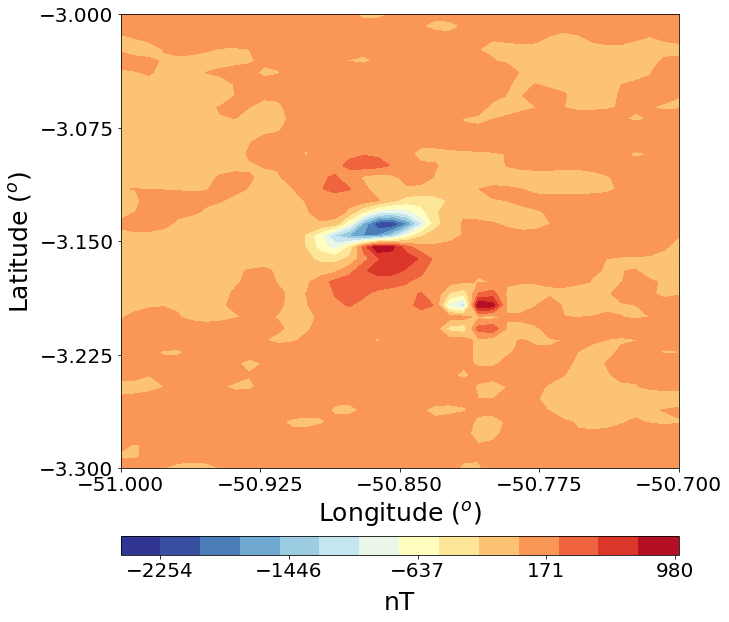

In [29]:
# Plotting the figure
pyplot.figure(figsize=(10,10))
cs1 = pyplot.contourf(long0.reshape(shape), lati0.reshape(shape), tf.reshape(shape), 
                15, vmin = tf.min(), vmax = tf.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(tf.min(), tf.max(), 5))
cb.set_clim(tf.min(), tf.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(long0.min(), long0.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(lati0.min(), lati0.max(), 5), fontsize = 20)
pyplot.xlim(long0.min(), long0.max())
pyplot.ylim(lati0.min(), lati0.max())
pyplot.savefig('figs/figure06(a)-anomaly-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/figure06(a)-anomaly-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

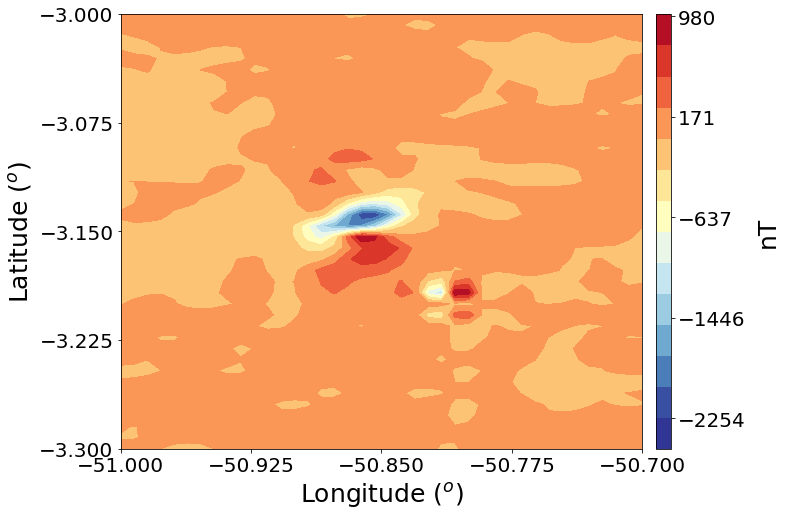

In [30]:
# Plotting the figure
pyplot.figure(figsize=(10,8))
cs1 = pyplot.contourf(long0.reshape(shape), lati0.reshape(shape), tf.reshape(shape), 
                15, vmin = tf.min(), vmax = tf.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(tf.min(), tf.max(), 5))
cb.set_clim(tf.min(), tf.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(long0.min(), long0.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(lati0.min(), lati0.max(), 5), fontsize = 20)
pyplot.xlim(long0.min(), long0.max())
pyplot.ylim(lati0.min(), lati0.max())
pyplot.savefig('figs/figure06(a)-anomaly-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/figure06(a)-anomaly-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [31]:
# Import the module of filtering potential field data
from codes import filtering, derivative, statistical

In [32]:
# Reshape the data
Xo = yo.reshape(shape)
Yo = xo.reshape(shape)
Zo = zo.reshape(shape)
TF = tf.reshape(shape)

In [33]:
# We apply a smoth upward continuation in order to eliminate the interference sources in the data
myup = filtering.continuation(Yo, Xo, TF, 3000.)

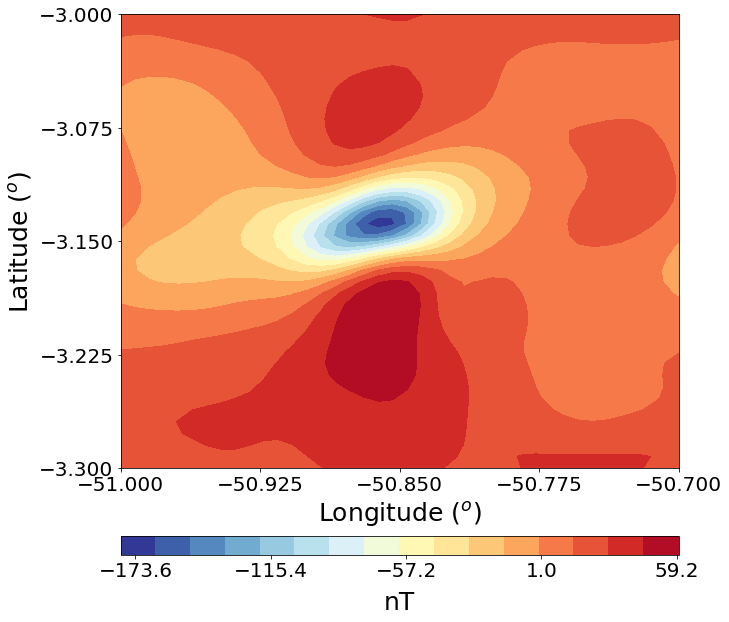

In [34]:
# Plotting the figure
pyplot.figure(figsize=(10,10))
cs1 = pyplot.contourf(long0.reshape(shape), lati0.reshape(shape), myup, 
                15, vmin = myup.min(), vmax = myup.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(myup.min(), myup.max(), 5))
cb.set_clim(myup.min(), myup.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(long0.min(), long0.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(lati0.min(), lati0.max(), 5), fontsize = 20)
pyplot.xlim(long0.min(), long0.max())
pyplot.ylim(lati0.min(), lati0.max())
pyplot.savefig('figs/figure06(a)-upward-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/figure06(a)-upward-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

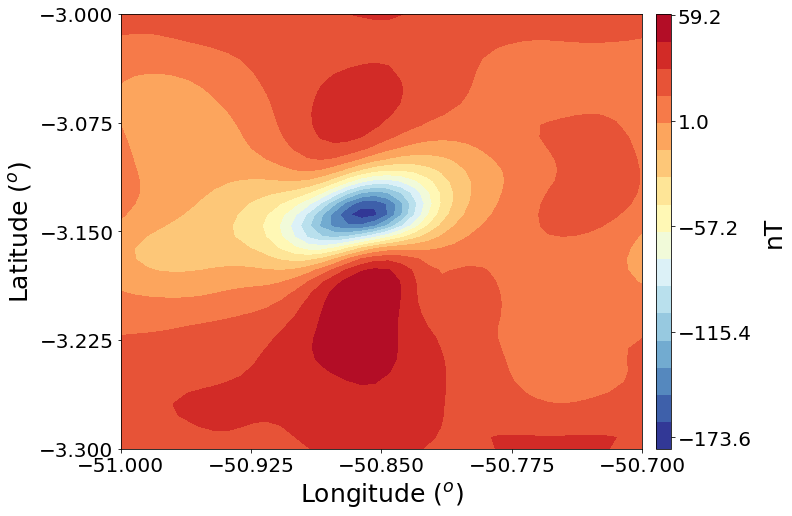

In [35]:
# Plotting the figure
pyplot.figure(figsize=(10,8))
cs1 = pyplot.contourf(long0.reshape(shape), lati0.reshape(shape), myup, 
                15, vmin = myup.min(), vmax = myup.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(myup.min(), myup.max(), 5))
cb.set_clim(myup.min(), myup.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(long0.min(), long0.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(lati0.min(), lati0.max(), 5), fontsize = 20)
pyplot.xlim(long0.min(), long0.max())
pyplot.ylim(lati0.min(), lati0.max())
pyplot.savefig('figs/figure06(a)-upward-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/figure06(a)-upward-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

# We will first apply the cross-correlation method on the convencional style, which is by applying the Fourier transform for the RTP anomaly only.

In [36]:
# Loading the magnetic inclination and declination from IGRF
inclination = numpy.loadtxt('inclination.csv', delimiter = ',', usecols=(4))
declination = numpy.loadtxt('declination.csv', delimiter = ',', usecols=(4))
magfield = numpy.loadtxt('magneticfield.csv', delimiter = ',', usecols=(4))

In [37]:
# Set the inclination and declination values
incf = inclination.mean()
decf = declination.mean()
field = magfield.mean()

In [38]:
# Visualize the values
print 'Magnetic inclination:  %.4f' % incf
print 'Magnetic declination:  %.4f' % decf
print 'Regional field intensity:  %.3f' % field

Magnetic inclination:  7.9722
Magnetic declination:  -17.2971
Regional field intensity:  27279.478


In [39]:
# Define the search area for correlation
inclination = numpy.linspace(-90., 90., 181)
declination = numpy.linspace(-90., 90., 91)
dec, inc = numpy.meshgrid(declination, inclination)

In [40]:
# Create the empty vector --> WND means wavenumber domain
res_wnd = numpy.zeros_like(dec)

In [41]:
# Compute the cross-correlation with RTP data calculated only in Fourier domain
ii = time.time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i == 0. or d == 0.:
            rtp = filtering.reduction(Yo, Xo, TF, incf, decf, i + 0.25, d + 0.25)
            res_wnd[k1, k2] = statistical.cccoef(derivative.totalgrad(Yo, Xo, rtp),
                                              derivative.zderiv(Yo, Xo, rtp))
        else:
            rtp = filtering.reduction(Yo, Xo, TF, incf, decf, i, d)
            res_wnd[k1, k2] = statistical.cccoef(derivative.totalgrad(Yo, Xo, rtp), 
                                              derivative.zderiv(Yo, Xo, rtp))
ff = time.time()
print 'Calculation process (in seconds): %.3f' % (ff-ii)

/home/delimar/Documents/sources/codes/auxiliars.py:251: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


Calculation process (in seconds): 35.589


In [42]:
# Analyzes the cross-correlation values
_ = statistical.analysis(res_wnd, 'no unit')

Minimum:    -0.6480 no unit
Maximum:    0.4056 no unit
Mean value: 0.0042 no unit
Variation:  1.0536 no unit


In [43]:
# Finding the [i,j] element of maximum coefficient
im, jm = numpy.where(res_wnd == res_wnd.max())
incm = float(inc[im, jm])
decm = float(dec[im, jm])
print '(I,D) maximo:', incm, decm

(I,D) maximo: -2.0 -2.0


/home/delimar/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'linestyle'
  s)


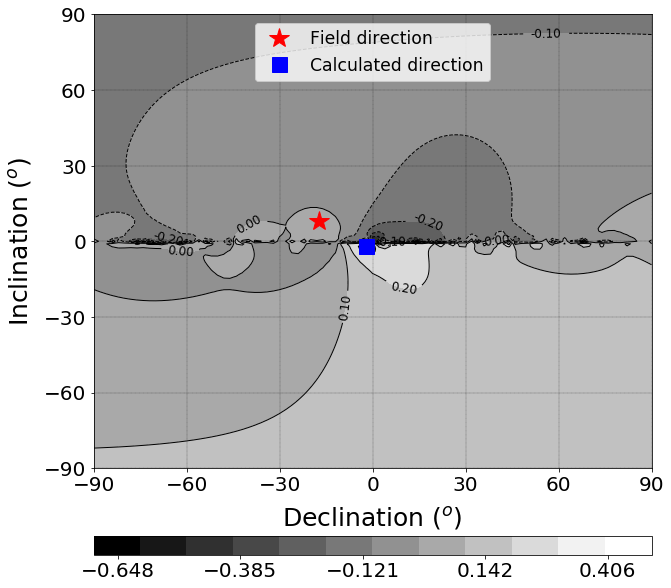

In [44]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(dec, inc, res_wnd, 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_wnd, 12, vmin = res_wnd.min(), vmax = res_wnd.max(), cmap = pyplot.cm.gray, alpha = 1.)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(res_wnd.min(), res_wnd.max(), 5))
cb.set_clim(res_wnd.min(), res_wnd.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)

pyplot.plot(decf, incf, 'r*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Calculated direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.25)

pyplot.savefig('figs/real01-correlation-fourier-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/real01-correlation-fourier-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

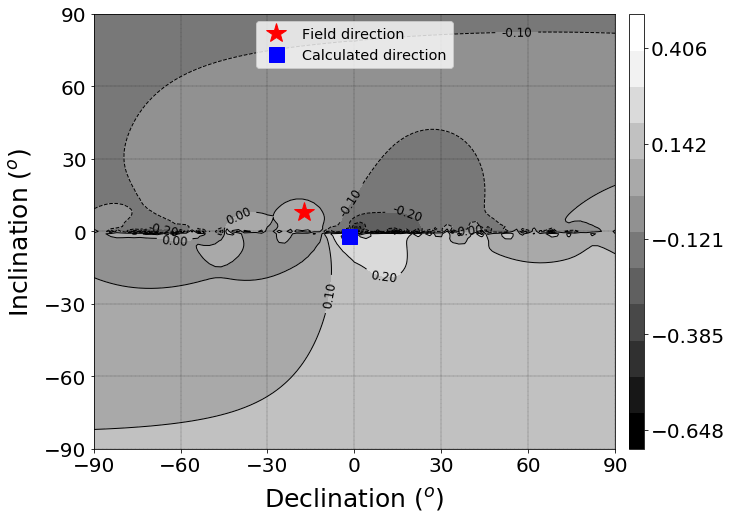

In [45]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10, 8))
ccfd = pyplot.contour(dec, inc, res_wnd, 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_wnd, 12, vmin = res_wnd.min(), vmax = res_wnd.max(), cmap = pyplot.cm.gray, alpha = 1.)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(res_wnd.min(), res_wnd.max(), 5))
cb.set_clim(res_wnd.min(), res_wnd.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)

pyplot.plot(decf, incf, 'r*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Calculated direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'x-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.25)

pyplot.savefig('figs/real01-correlation-fourier-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/real01-correlation-fourier-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

/home/delimar/anaconda2/lib/python2.7/site-packages/matplotlib/collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


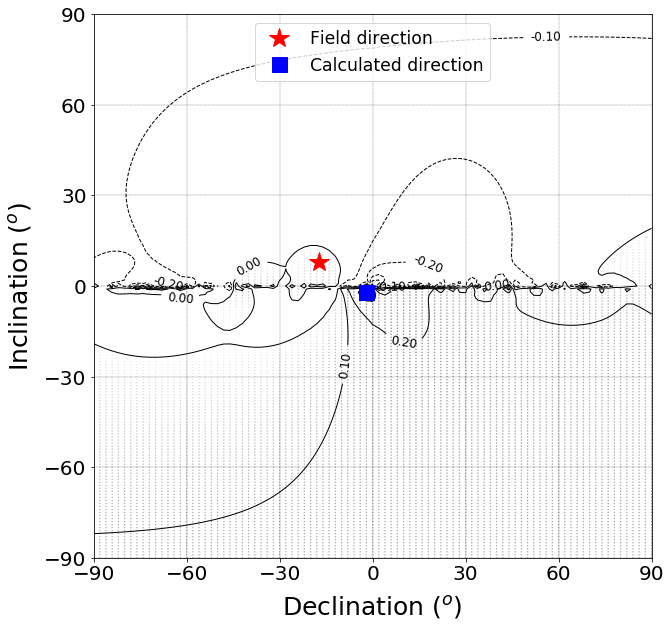

In [46]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(dec, inc, res_wnd, 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.scatter(dec, inc, s = res_wnd, c = 'gray', vmin = res_wnd.min(), vmax = res_wnd.max(), cmap = pyplot.cm.gray)
pyplot.plot(decf, incf, 'r*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Calculated direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.25)

pyplot.savefig('figs/real01-correlation-fourier-r1(scatter).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/real01-correlation-fourier-r1(scatter).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [47]:
# Test the encountered direction by applying the reduction to pole
rtpfd = filtering.reduction(Yo, Xo, TF, incf, decf, incm, decm)

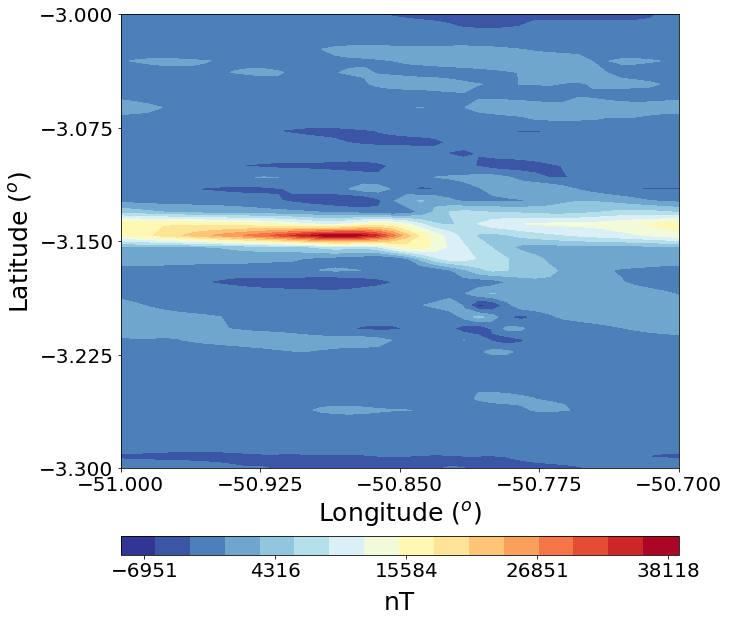

In [48]:
# Plotting the figure
pyplot.figure(figsize=(10,10))
cs1 = pyplot.contourf(long0.reshape(shape), lati0.reshape(shape), rtpfd, 
                15, vmin = rtpfd.min(), vmax = rtpfd.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(rtpfd.min(), rtpfd.max(),5))
cb.set_clim(rtpfd.min(), rtpfd.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(long0.min(), long0.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(lati0.min(), lati0.max(), 5), fontsize = 20)
pyplot.xlim(long0.min(), long0.max())
pyplot.ylim(lati0.min(), lati0.max())
pyplot.savefig('figs/real01-reduction-fourier-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/real01-reduction-fourier-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

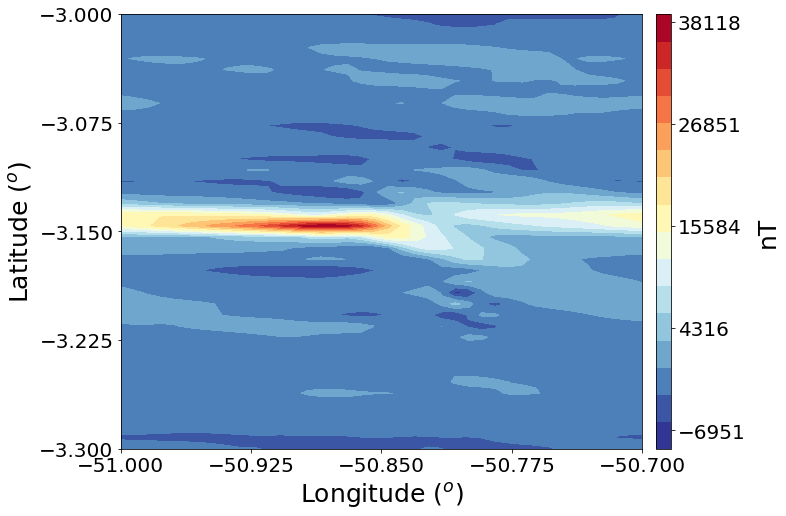

In [49]:
# Plotting the figure
pyplot.figure(figsize=(10,8))
cs1 = pyplot.contourf(long0.reshape(shape), lati0.reshape(shape), rtpfd, 
                15, vmin = rtpfd.min(), vmax = rtpfd.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(rtpfd.min(), rtpfd.max(),5))
cb.set_clim(rtpfd.min(), rtpfd.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(long0.min(), long0.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(lati0.min(), lati0.max(), 5), fontsize = 20)
pyplot.xlim(long0.min(), long0.max())
pyplot.ylim(lati0.min(), lati0.max())
pyplot.savefig('figs/real01-reduction-fourier-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/real01-reduction-fourier-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

For the equivalent layer - vectors: $\left[\bar{xo}, \bar{yo}, \bar{zo}, \bar{tf} \right]$

For the reduction filter - matrixs: $\left[\mathbf{X_o}, \mathbf{Y_o},  \mathbf{Z_o}, \mathbf{TF_o} \right]$

In [50]:
# Import the equivalent layer module
from codes import equivalentlayer

In [51]:
# Define the equivalent layer and the grid
#areal = (yo.min() + 5000.,  yo.max() - 5000., xo.min() + 5000., xo.max() - 5000.)
areal = (yo.min(), yo.max(), xo.min(), xo.max())
shapel = (15, 15)
level = 6000.
xlayer, ylayer, zlayer = grids.regular_grid(areal, shapel, level)

In [52]:
# Performe the equivalent layer
EQL = equivalentlayer.layer(areal, shapel, level)

In [53]:
# Reshape of upward data
do = myup.reshape(myup.size)

In [54]:
# Define the data
datalayer = [yo, xo, zo, do]

In [55]:
# Calculate the parameter vector and the fitted data
vec, fitted = equivalentlayer.fit_layer_mag(datalayer, shape, EQL, shapel, 1.e-3, incf, decf)

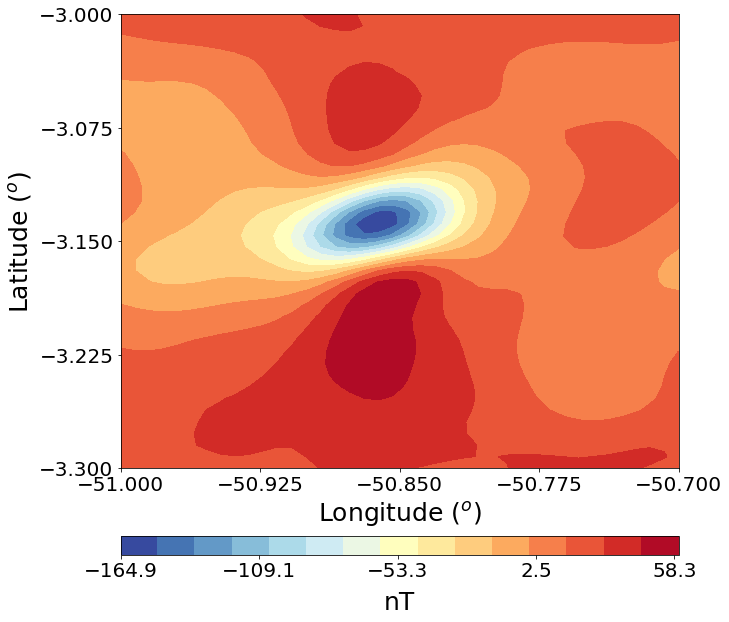

In [56]:
# Plotting the figure
pyplot.figure(figsize=(10,10))
cs1 = pyplot.contourf(long0.reshape(shape), lati0.reshape(shape), fitted.reshape(shape), 
                15, vmin = fitted.min(), vmax = fitted.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(fitted.min(), fitted.max(), 5))
cb.set_clim(fitted.min(), fitted.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(long0.min(), long0.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(lati0.min(), lati0.max(), 5), fontsize = 20)
pyplot.xlim(long0.min(), long0.max())
pyplot.ylim(lati0.min(), lati0.max())
pyplot.savefig('figs/real-fitted-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/real-fitted-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

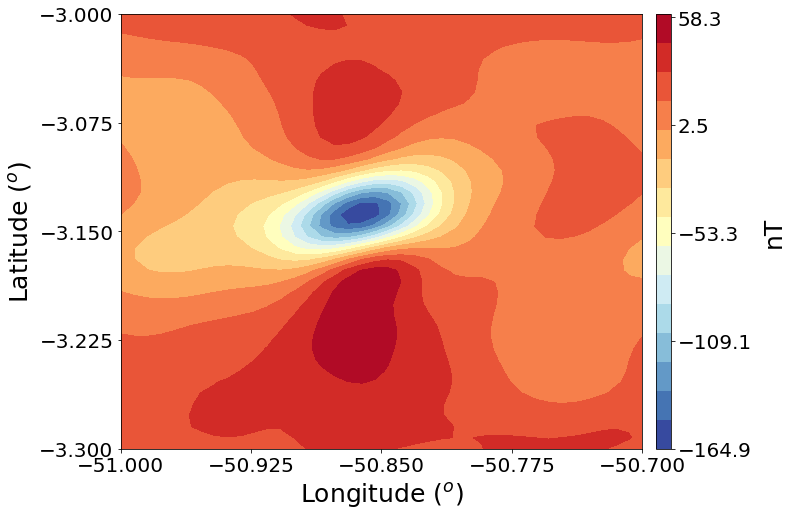

In [57]:
# Plotting the figure
pyplot.figure(figsize=(10,8))
cs1 = pyplot.contourf(long0.reshape(shape), lati0.reshape(shape), fitted.reshape(shape), 
                15, vmin = fitted.min(), vmax = fitted.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(fitted.min(), fitted.max(), 5))
cb.set_clim(fitted.min(), fitted.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(long0.min(), long0.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(lati0.min(), lati0.max(), 5), fontsize = 20)
pyplot.xlim(long0.min(), long0.max())
pyplot.ylim(lati0.min(), lati0.max())
pyplot.savefig('figs/real-fitted-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/real-fitted-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [58]:
# Import the scipy normalization
from scipy.stats import norm

In [59]:
# Calculated the residual and perfform a statiscal study
residuo = tf - fitted
res_mu = numpy.mean(residuo)
res_sigma = numpy.std(residuo)

/home/delimar/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


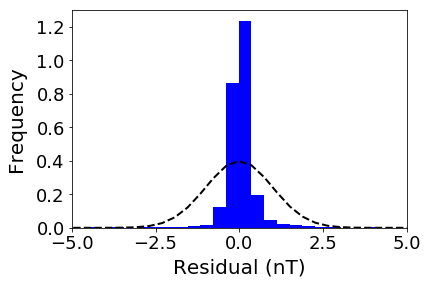

In [60]:
# Plotting the histogram of residual
s = (residuo - res_mu) / res_sigma
s = numpy.ravel(s)
nbins = int(numpy.max(s) - numpy.min(s))
n, bins, patches = pyplot.hist(s, 50, normed = True, facecolor = 'blue', alpha = 1.)
y_hist = norm.pdf(bins, numpy.mean(s), numpy.std(s))
pyplot.plot(bins, y_hist, 'k--', linewidth = 2)
#pyplot.text(3.5,0.25, '$\mu$=%0.5f' % (res_mu), horizontalalignment = 'center', fontsize = 12)
#pyplot.text(3.5,0.3, '$\sigma$=%0.5f' % (res_sigma), horizontalalignment = 'center', fontsize = 12)
pyplot.xlabel('Residual (nT)' , fontsize = 20, labelpad = 5)
pyplot.ylabel('Frequency', fontsize = 20, labelpad = 10)
pyplot.xlim(-5,5)
pyplot.xticks(numpy.arange(-5., 5 + 2.5, 2.5), fontsize = 18)
pyplot.yticks(fontsize = 18)
pyplot.savefig('figs/histogram-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/histogram-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

# (2) Multidomain cross-correlation applied at Carajás (Brazil)

In [61]:
# Define the search area for multidomain correlation
inclination = numpy.linspace(-90., 90., 37)
declination = numpy.linspace(-90., 90., 19)
dec, inc = numpy.meshgrid(declination, inclination)

In [62]:
# Create the empty vector --> SD means space domain
res_sd = numpy.zeros_like(dec)

In [63]:
# Compute the cross-correlation with RTP data calculated only in Fourier domain
ii = time.time()
for k2, d in enumerate(declination):
    for k1, i in enumerate(inclination):
        if i >= -15. or i <= 15.:
            rtp = equivalentlayer.rtp_layer(datalayer, shape, EQL, shapel, 1.e-3, incf, decf, i, d)
            res_sd[k1, k2] = statistical.cccoef(derivative.totalgrad(Yo, Xo, rtp.reshape(shape)),
                                                derivative.zderiv(Yo, Xo, rtp.reshape(shape)))
        else:
            rtp = filtering.reduction(Yo, Xo, TF, incf, decf, i, d)
            res_sd[k1, k2] = statistical.cccoef(derivative.totalgrad(Yo, Xo, rtp), 
                                                derivative.zderiv(Yo, Xo, rtp))
ff = time.time()
print 'Calculation process (in seconds): %.3f' % (ff-ii)

Calculation process (in seconds): 564.357


In [64]:
# Analyzes the cross-correlation values
_ = statistical.analysis(res_sd, 'no unit')

Minimum:    -0.1492 no unit
Maximum:    0.5979 no unit
Mean value: 0.0479 no unit
Variation:  0.7471 no unit


In [65]:
# Finding the [i,j] element of maximum coefficient
im, jm = numpy.where(res_sd == res_sd.max())
incm = float(inc[im, jm])
decm = float(dec[im, jm])
print '(I,D) maximo:', incm, decm

(I,D) maximo: -5.0 10.0


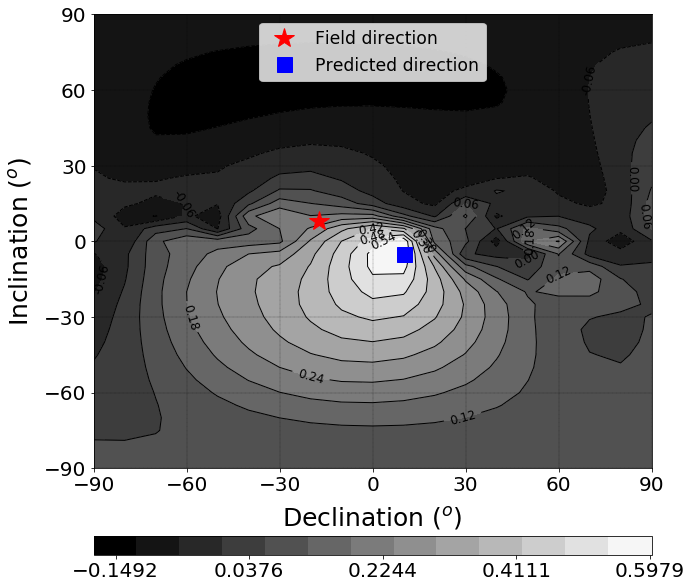

In [66]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(dec, inc, res_sd, 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_sd, 12, vmin = res_sd.min(), vmax = res_sd.max(), cmap = pyplot.cm.gray, alpha = 1.)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(res_sd.min(), res_sd.max(), 5))
cb.set_clim(res_sd.min(), res_sd.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decf, incf, 'r*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.25)

pyplot.savefig('figs/real-correlation-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/real-correlation-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

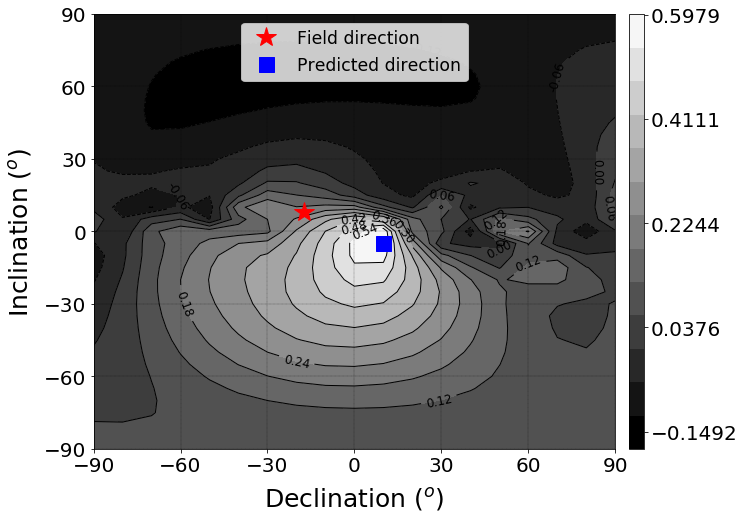

In [67]:
# Plot the contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,8))
ccfd = pyplot.contour(dec, inc, res_sd, 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(dec, inc, res_sd, 12, vmin = res_sd.min(), vmax = res_sd.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(res_sd.min(), res_sd.max(), 5))
cb.set_clim(res_sd.min(), res_sd.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decf, incf, 'r*', label = 'Field direction', markersize = 20)
pyplot.plot(decm, incm, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.25)

pyplot.savefig('figs/real-correlation-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/real-correlation-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [68]:
# We have to interpolate the data just in order to make it smoother
areai = (-90., 90., -90., 90)
shapei = (181, 181)
inci, deci = grids.regular_grid(areai, shapei)

In [69]:
# Interpolated
datai = griddata((inc.reshape(inc.size), dec.reshape(dec.size)), 
                 res_sd.reshape(res_sd.size), (inci, deci), method = 'cubic')

In [70]:
# Reshape the data
datai = datai.reshape(shapei)

In [71]:
# Finding the [i,j] element of maximum coefficient
im, jm = numpy.where(datai.reshape(shapei) ==  datai.max())
incmi = float(inci.reshape(shapei)[im, jm])
decmi = float(deci.reshape(shapei)[im, jm])
print '(I,D) maximo:', incmi, decmi

(I,D) maximo: -2.0 7.0


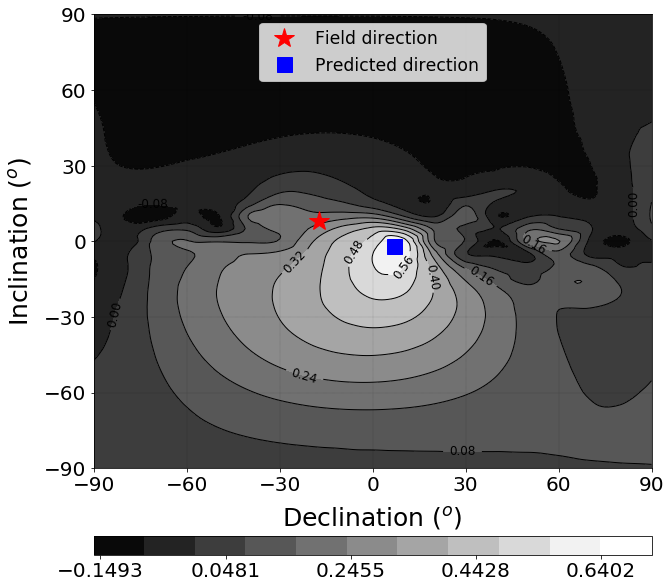

In [72]:
# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(10,10))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 12, 
                       vmin = datai.min(), vmax = datai.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(datai.min(), datai.max(), 5))
cb.set_clim(datai.min(), datai.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decf, incf, 'r*', label = 'Field direction', markersize = 20)
pyplot.plot(decmi, incmi, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

pyplot.savefig('figs/figure07(a)-correlation-upward-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/figure07(a)-correlation-upward-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

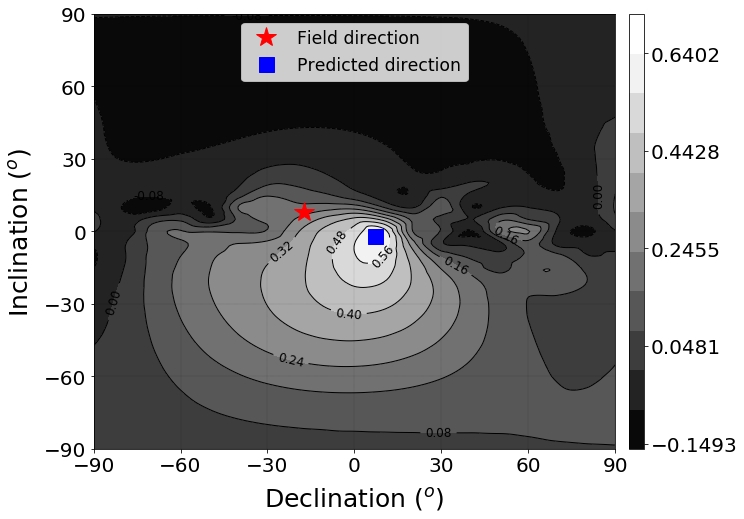

In [73]:
# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(10, 8))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.contourf(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 12, 
                       vmin = datai.min(), vmax = datai.max(), cmap = pyplot.cm.gray, alpha = 1)
cb = pyplot.colorbar(csfd, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(datai.min(), datai.max(), 5))
cb.set_clim(datai.min(), datai.max())
#cb.set_label('Cross-correlation coefficients', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.plot(decf, incf, 'r*', label = 'Field direction', markersize = 20)
pyplot.plot(decmi, incmi, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

pyplot.savefig('figs/figure07(a)-correlation-upward-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/figure07(a)-correlation-upward-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

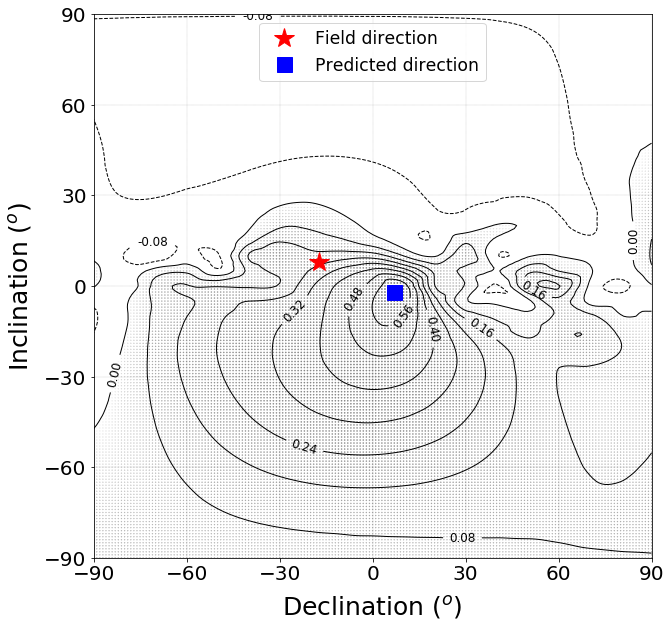

In [74]:
# Plot the final contour map of cross-correlation coefficients
pyplot.figure(figsize=(10, 10))
ccfd = pyplot.contour(deci.reshape(shapei), inci.reshape(shapei), datai.reshape(shapei), 12, colors = 'k', linestyle = 'solid', linewidths = 1.)
pyplot.clabel(ccfd,  inline = 1, fontsize = 12, fmt = '%1.2f')

csfd = pyplot.scatter(deci.reshape(shapei), inci.reshape(shapei), s = datai.reshape(shapei), c = 'gray', vmin = datai.min(), vmax = datai.max())
pyplot.plot(decf, incf, 'r*', label = 'Field direction', markersize = 20)
pyplot.plot(decmi, incmi, 'bs', label = 'Predicted direction', markersize = 15)
pyplot.xlabel('Declination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.ylabel('Inclination $(^o)$', fontsize = 25, labelpad = 10)
pyplot.xticks(numpy.linspace(dec.min(), dec.max(), 7), fontsize = 20)
pyplot.yticks(numpy.linspace(inc.min(), inc.max(), 7), fontsize = 20)
pyplot.xlim(dec.min(), dec.max())
pyplot.ylim(inc.min(), inc.max())
pyplot.legend(loc = 'upper center', fontsize = 'xx-large')
pyplot.grid(color = 'k', linestyle='--', linewidth = 0.1)

pyplot.savefig('figs/figure07(a)-correlation-upward-r1(scatter).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/figure07(a)-correlation-upward-r1(scatter).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

In [89]:
# Test the encountered direction by applying the reduction to pole
rtpsd = equivalentlayer.rtp_layer(datalayer, shape, EQL, shapel, 4.e-2, incf, decf, incmi, decmi)

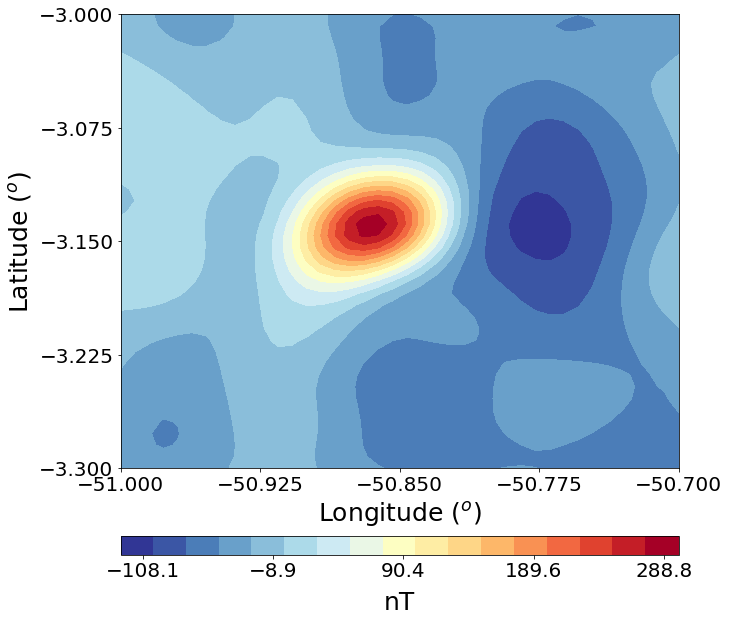

In [90]:
# Plotting the figure
pyplot.figure(figsize=(10,10))
cs1 = pyplot.contourf(long0.reshape(shape), lati0.reshape(shape), rtpsd.reshape(shape), 
                15, vmin = rtpsd.min(), vmax = rtpsd.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'horizontal', pad = 0.125)
cb.set_ticks(numpy.linspace(rtpsd.min(), rtpsd.max(), 5))
cb.set_clim(rtpsd.min(), rtpsd.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(long0.min(), long0.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(lati0.min(), lati0.max(), 5), fontsize = 20)
pyplot.xlim(long0.min(), long0.max())
pyplot.ylim(lati0.min(), lati0.max())
pyplot.savefig('figs/figure08-rtp-upward-r1.png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/figure08-rtp-upward-r1.pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()

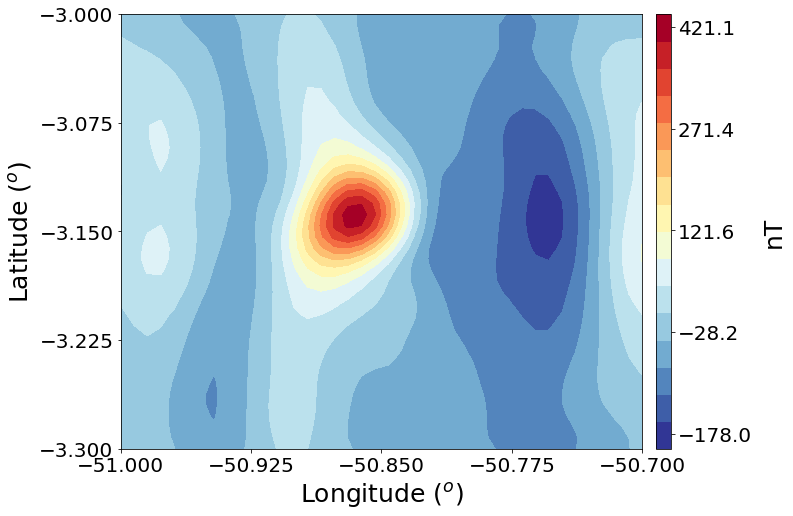

In [77]:
# Plotting the figure
pyplot.figure(figsize=(10,8))
cs1 = pyplot.contourf(long0.reshape(shape), lati0.reshape(shape), rtpsd.reshape(shape), 
                15, vmin = rtpsd.min(), vmax = rtpsd.max(), cmap = pyplot.cm.RdYlBu_r)
cb = pyplot.colorbar(cs1, shrink = 1., aspect = 30, fraction = 0.04, orientation = 'vertical', pad = 0.025)
cb.set_ticks(numpy.linspace(rtpsd.min(), rtpsd.max(), 5))
cb.set_clim(rtpsd.min(), rtpsd.max())
cb.set_label('nT', fontsize = 25, labelpad = 10)
cb.ax.tick_params(labelsize = 20)
pyplot.xlabel('Longitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.ylabel('Latitude $(^o)$', fontsize = 25, labelpad = 5)
pyplot.xticks(numpy.linspace(long0.min(), long0.max(), 5), fontsize = 20)
pyplot.yticks(numpy.linspace(lati0.min(), lati0.max(), 5), fontsize = 20)
pyplot.xlim(long0.min(), long0.max())
pyplot.ylim(lati0.min(), lati0.max())
pyplot.savefig('figs/figure08-rtp-upward-r1(side).png', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.savefig('figs/figure08-rtp-upward-r1(side).pdf', dpi = 300, bbox_inches = 'tight', transparent = True)
pyplot.show()